# Lab4 Intro
Now that you have classified the Voice of Customers into categories in the previous experiment, you can use Generative AI techniques to write analysis report for you further.

### Your objectives are:

- Explore the statistical results of classification
- Write a summary analysis report
- Tuning the prompt instruction to enhance the report

## 1. Install dependencies

In [ ]:
!pip install -Uq boto3 langchain==0.2.16 langchain_aws==0.1.17 pandas openpyxl termcolor

## 2. Initialize Bedrock model using LangChain

We will continue to use Amazon Titan Model to help generate analysis for the result. Different from Lab 1, here we apply the ChatBedrockConverse object which provides a unified conversational interface for Bedrock models.
- We use [Langchain](https://www.langchain.com/) SDK to build the application
- Initialize a ChatBedrockConverse object with Amzon Titan Text model with the model id "amazon.titan-text-premier-v1:0"

In [14]:
from langchain_aws import ChatBedrock,ChatBedrockConverse
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain_core.output_parsers import StrOutputParser,XMLOutputParser,JsonOutputParser
from langchain_core.prompts import ChatPromptTemplate,MessagesPlaceholder,HumanMessagePromptTemplate

model_id = "amazon.titan-text-premier-v1:0" 

llm = ChatBedrockConverse(
    model=model_id,
    temperature=0.1,
    max_tokens=3000,
)

- test run

In [15]:
messages = [
    ("human", "translate to french: I love programming."),
]

In [16]:
for chunk in llm.stream(messages):
    if chunk.content and chunk.content[0].get('type') == 'text':
        print(chunk.content[0]['text'],end='',flush=True)

Here is your translation: J'aime la programmation.

## 3. Load the VOC classification results data

At the end of Lab 3, we saved the classified results data into result_lab_3.csv file. To begin our analysis, we first need to load this results data and review its contents.

- Load the classification result data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

In [20]:
raw_data = pd.read_csv('result_lab_3.csv')

- Use columns 'id','summary','reason','predict_label' 

For analysis purpose, we only need data from column 'summary', 'reason', and 'predict_label'. Execute the code below to retrieve these columns data and rename the column 'predict_label' to 'category'.

In [21]:
results = raw_data[['summary','reason','predict_label']].rename(columns={'predict_label':'category'})
results

,summary,reason,category
0,"'After switching to a new operating system, my...",The user mentions that their phone is no longe...,charging failure
1,The phone's battery health has dropped to 95% ...,The user mentions a decrease in battery health...,abnormal battery health
2,The user expresses concern about the rapid dec...,The user mentions the decrease in battery heal...,abnormal battery health
3,The camera quality of the smartphone is disapp...,The user expresses dissatisfaction with the ca...,camera color deviation
4,"The update speed of this phone is slow, and it...",The user expresses concern about the slow upda...,slow update
...,...,...,...
195,"The phone's screen is less responsive, making ...",The user describes the phone's screen as less ...,unresponsive screen
196,"'After the recent software update, my device h...",The user mentions that their device has shut d...,"automatic restart, shutdown"
197,Users are reporting that their phones are no l...,Users are reporting that their phones are no l...,sim card not detected
198,The user's phone has been getting slower and s...,The user mentions that their phone is getting ...,high storage usage


## 4. A simple summary report

We have defined a simple system prompt and user prompt to instruct Amazon Titan model to generate a analysis report. The results data will be incorporated into the prompt as a variable, allowing the model to access and utilize this information in its report generation.

### 4.1 Define system prompt and user prompt template

In [22]:
user = """
You are a data analysis expert in the retail industry. 
Your task is to analyze the given data and write a narrative summary analysis report.
Follow these instructions:

<instructions>
- Transform the data into natural language, including all key data points as much as possible
- Only provide the final narrative report, do not show any intermediate analysis steps or processes
- Give insights and interpretations about the data in your narrative
</instructions>

Here is the tabular data in json to analyze:
<data>
{tabular}
</data>

Please summarize the data in a narrative report format, following the instructions above.
"""

- Create a langchain chat template

In [23]:
prompt_simple = ChatPromptTemplate([
    ('user',user),
    ])
chain = prompt_simple | llm | StrOutputParser()

### 4.2 Generate the report
- convert the tabular data to json string and pass them to llm

In [24]:
response = ''
for chunk in chain.stream({"tabular":results.to_json()}):
    print(colored(chunk,"green"),end='',flush=True)
    response += chunk

The data reveals that users have encountered various issues with their smartphones, including overheating, weak signal, camera color deviation, and slow or failed data migration. Some users have reported that their phones are becoming increasingly sluggish and unresponsive, while others have experienced problems with the camera, such as black screens and color deviation. Additionally, some users have reported issues with the phone's battery, such as fast battery drain and abnormal battery health.

Users have also reported problems with the phone's software, such as slow updates, update failures, and data loss after updating. Some users have experienced issues with the phone's user interface, such as screen flickering and user interface errors.

Furthermore, some users have reported issues with the phone's hardware, such as poor manufacturing quality, easily retaining fingerprints, and third-party charger and data cable incompatibility. Some users have also reported issues with the phon

## 5. Advanced version of report

The example provided above is a basic demonstration of the analysis generation capabilities of a Large Language Model. Now let's craft the prompt to generate a more comprehensize, concise, and detailed version of report.

The prompt provided below are much more detailed and contains steps-by-steps instruction and clear structure that can guide the LLM to generate a report rich in information. Additionally, we have supplied the LLM with statistical data, specifically the summary numbers of comments by category, to provide further context and enhance the depth of the analysis in the report.

- Add formation instruction and statistic data to enhance the report

- Let's stat the number of comments by categories

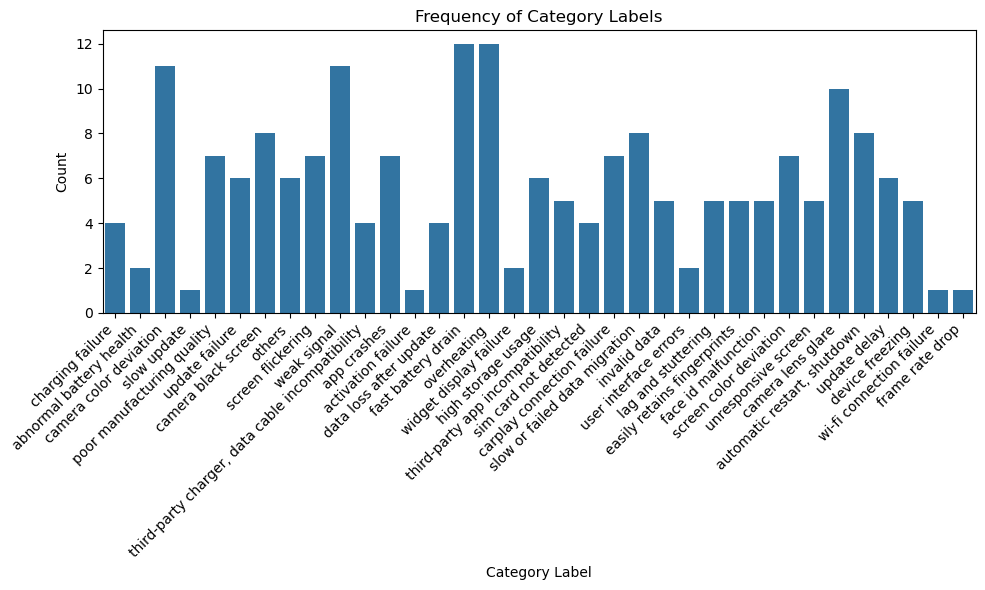

,summary
category,
abnormal battery health,2
activation failure,1
app crashes,7
"automatic restart, shutdown",8
camera black screen,8
camera color deviation,11
camera lens glare,10
carplay connection failure,7
charging failure,4


In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=results[['category']])
plt.title('Frequency of Category Labels')
plt.xlabel('Category Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

statistic_label = results.pivot_table(index='category',aggfunc='count')
statistic_label[['summary']]

### 5.1 Define system prompt and user prompt template
- we add instruction to generate report in certain content agenda as:
```markdown
# Executive Summary
Provide a brief overview of the report, summarizing key findings, conclusions, and recommendations. This section should be concise, allowing readers to grasp the main points quickly.

# Data Presentation
Data Overview: Provide a summary of the datasets used, including key metrics and attributes.
Key Performance Indicators (KPIs): Highlight the KPIs that are critical to the analysis.

# Findings
Present the results of the analysis in a structured manner:
Descriptive Statistics: Summarize the main characteristics of the data.
Trends and Patterns: Discuss any significant trends or patterns identified.
Comparative Analysis: If applicable, compare different datasets or time periods.

# Discussion
Interpret the findings in the context of the initial questions posed in the introduction.
Discuss the implications of the results, including potential impacts on business strategies or operations.
Address any unexpected results or anomalies.

# Conclusions
Summarize the key insights derived from the analysis.
Restate the significance of the findings in relation to the report’s objectives.

# Recommendations
Provide actionable recommendations based on the findings. These should be specific and feasible, guiding stakeholders on the next steps.
```

- And add additional context of statistic data in json


In [26]:
user = """
You are a data analysis expert in the retail industry
Your task is to analyze the given data and write a data analysis report. Follow these instructions:

- instructions:
- Transform the data into natural language, including all key data points as much as possible
- Only provide the final narrative report, do not show any intermediate analysis steps or processes
- Give insights and interpretations about the data in your narrative|
- the report should follow the content agenda as below:

# Executive Summary
Provide a brief overview of the report, summarizing key findings, conclusions, and recommendations. 
This section should be concise, no more than 100 words.

# Data Presentation
Data Overview: Provide a summary of the datasets used, including key metrics and attributes.
Key Performance Indicators (KPIs): Highlight the KPIs that are critical to the analysis.

# Findings
Present the results of the analysis in a structured manner:
Descriptive Statistics: Summarize the main characteristics of the data.
Trends and Patterns: Discuss any significant trends or patterns identified.
Comparative Analysis: If applicable, compare different datasets or time periods.

# Discussion
Interpret the findings in the context of the initial questions posed in the introduction.
Discuss the implications of the results, including potential impacts on business strategies or operations.
Address any unexpected results or anomalies.

# Conclusions
Summarize the key insights derived from the analysis.
Restate the significance of the findings in relation to the report’s objectives.

# Recommendations
Provide actionable recommendations based on the findings. These should be specific and feasible, guiding stakeholders on the next steps.


Here is the tabular data in json to analyze:
{tabular}

Here are the statistic data in json:
{statistic}

Please generate the report in markdown format:
"""

- Create a langchain chat template

In [27]:
prompt_advanced_1 = ChatPromptTemplate([
    ('user',user),
    ])
chain_advanced = prompt_advanced_1 | llm | StrOutputParser()

- convert the tabular data and statistic to json string and pass them to llm

In [28]:
response_advanced = ''
for chunk in chain_advanced.stream({"tabular":results.to_json(),
                          'statistic':statistic_label['summary'].to_json()}):
    print(colored(chunk,"green"),end='',flush=True)
    response_advanced += chunk

# Executive Summary
This report analyzes user feedback on smartphones and laptops, focusing on issues such as battery health, camera quality, and software updates. The findings reveal that users encounter various problems, including abnormal battery health, camera color deviation, and automatic restarts/shutdowns. Additionally, users report issues with software updates, such as data loss after updates and update failures.

# Data Presentation
The dataset includes 200 user comments, categorized into 31 issues. The most common issues are camera color deviation (11 comments), abnormal battery health (2 comments), and automatic restarts/shutdowns (8 comments).

# Findings
- Battery Health: Users report abnormal battery health, with some experiencing a rapid decrease in battery health.
- Camera Quality: Users express dissatisfaction with camera quality, citing issues such as color deviation and black screens.
- Software Updates: Users encounter problems with software updates, including data

### 5.2 Display the report in markdown

In [29]:
from IPython.display import Markdown, display,HTML
display(Markdown(response_advanced))

# Executive Summary
This report analyzes user feedback on smartphones and laptops, focusing on issues such as battery health, camera quality, and software updates. The findings reveal that users encounter various problems, including abnormal battery health, camera color deviation, and automatic restarts/shutdowns. Additionally, users report issues with software updates, such as data loss after updates and update failures.

# Data Presentation
The dataset includes 200 user comments, categorized into 31 issues. The most common issues are camera color deviation (11 comments), abnormal battery health (2 comments), and automatic restarts/shutdowns (8 comments).

# Findings
- Battery Health: Users report abnormal battery health, with some experiencing a rapid decrease in battery health.
- Camera Quality: Users express dissatisfaction with camera quality, citing issues such as color deviation and black screens.
- Software Updates: Users encounter problems with software updates, including data loss after updates and update failures.
- Overheating: Users report overheating issues, which could negatively impact sales and user experience.

# Discussion
The findings suggest that manufacturers should prioritize improving battery health, camera quality, and software update processes. Addressing these issues can enhance user satisfaction and build brand loyalty.

# Conclusions
The analysis reveals that users face various issues with smartphones and laptops, particularly in battery health, camera quality, and software updates. Addressing these issues can improve user satisfaction and build brand loyalty.

# Recommendations
- Battery Health: Manufacturers should invest in research and development to improve battery health and address abnormal battery health issues.
- Camera Quality: Manufacturers should focus on improving camera quality, including color accuracy and image clarity.
- Software Updates: Manufacturers should prioritize software update processes, ensuring that updates are stable, reliable, and do not result in data loss.
- Overheating: Manufacturers should address overheating issues to improve user experience and prevent potential damage to devices.